In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!tar -xvf /content/drive/My\ Drive/yolo5/data.tar.xz -C /content/ 

Streaming output truncated to the last 5000 lines.
labels/train/India_002877.txt
labels/train/India_004005.txt
labels/train/India_005777.txt
labels/train/India_000124.txt
labels/train/India_004705.txt
labels/train/India_003822.txt
labels/train/India_009826.txt
labels/train/India_008842.txt
labels/train/India_001910.txt
labels/train/India_005734.txt
labels/train/India_004366.txt
labels/train/India_007387.txt
labels/train/India_006073.txt
labels/train/India_009550.txt
labels/train/India_001113.txt
labels/train/India_006782.txt
labels/train/India_008308.txt
labels/train/India_003868.txt
labels/train/India_002172.txt
labels/train/India_001208.txt
labels/train/India_008905.txt
labels/train/India_006249.txt
labels/train/India_006696.txt
labels/train/India_004993.txt
labels/train/India_007704.txt
labels/train/India_008207.txt
labels/train/India_003758.txt
labels/train/India_005379.txt
labels/train/India_000826.txt
labels/train/India_003457.txt
labels/train/India_001756.txt
labels/train/India_

In [ ]:
import glob
size = len(glob.glob("/content/images/train/" + "*.jpg")) #+ len(glob.glob("/content/labels/val/" + "*.txt"))
print(size)

3895


In [ ]:
#preprocessing
#class_reduction
import os
import glob

names= ["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44"]

actualNames = ['Linear crack(0-3)','Alligator crack 4','Potholes 5','Shoulders']

linCrack = ['0','1','2','3']


count = 0 
directory = r"/content/labels/test"


for entry in os.scandir(directory):
    if (entry.path.endswith(".txt")):
        # print(type(entry.path))
        stringArr = []
        with open(entry.path,'r') as reader:
            for lines in reader.readlines():
                if lines[0] in linCrack:
                    lines = '0'+lines[1:]
                elif lines[0] == '4':
                    lines = '1'+lines[1:]
                elif lines[0]=='5':
                    lines = '2'+lines[1:]
                else:
                    lines = '3'+lines[1:]
                stringArr.append(lines)
            
            with open(entry.path,'w') as f:
                for line in stringArr:
                    f.write(line)
                f.close()
            reader.close()


In [165]:
#removing empty files
indir = r"/content/labels/train"

os.chdir(indir)
fileList=glob.glob("*.txt")
txtnameList = []
imgnameList = []
for filename in fileList:
    if os.stat(filename).st_size==0:
        fil = os.path.splitext(filename)[0] + ".jpg"
        imgnameList.append(fil)
        txtnameList.append(filename)
        #os.remove(filename)
txtSize = len(txtnameList)
imgSize = len(imgnameList)
for i in range(0, int(0.6 * txtSize)):
    os.remove(txtnameList[i])

indir = r"/content/images/val"
os.chdir(indir)
for i in range(0, int(imgSize)):
    os.remove(imgnameList[i])

FileNotFoundError: ignored

In [163]:
import shutil
import os

source = '/content/labels/val/'
dest1 = '/content/labels/train/'

files = os.listdir(source)

for f in files:
    shutil.move(source+f, dest1)

In [178]:
print(len(glob.glob("/content/labels/train/" + "*.txt")))
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams["axes.grid"] = False

3807


Start


# Exploratory Data Analysis
In this Notebook, we are exploring the data we have and gauging the performance of how the PCI Calculation Formula we have developed performs on real world data!


#The Data
We will be testing our formula on dataset that contains aprroximately 4000 images!
Let's see some random samples that reflect the real world's roads.

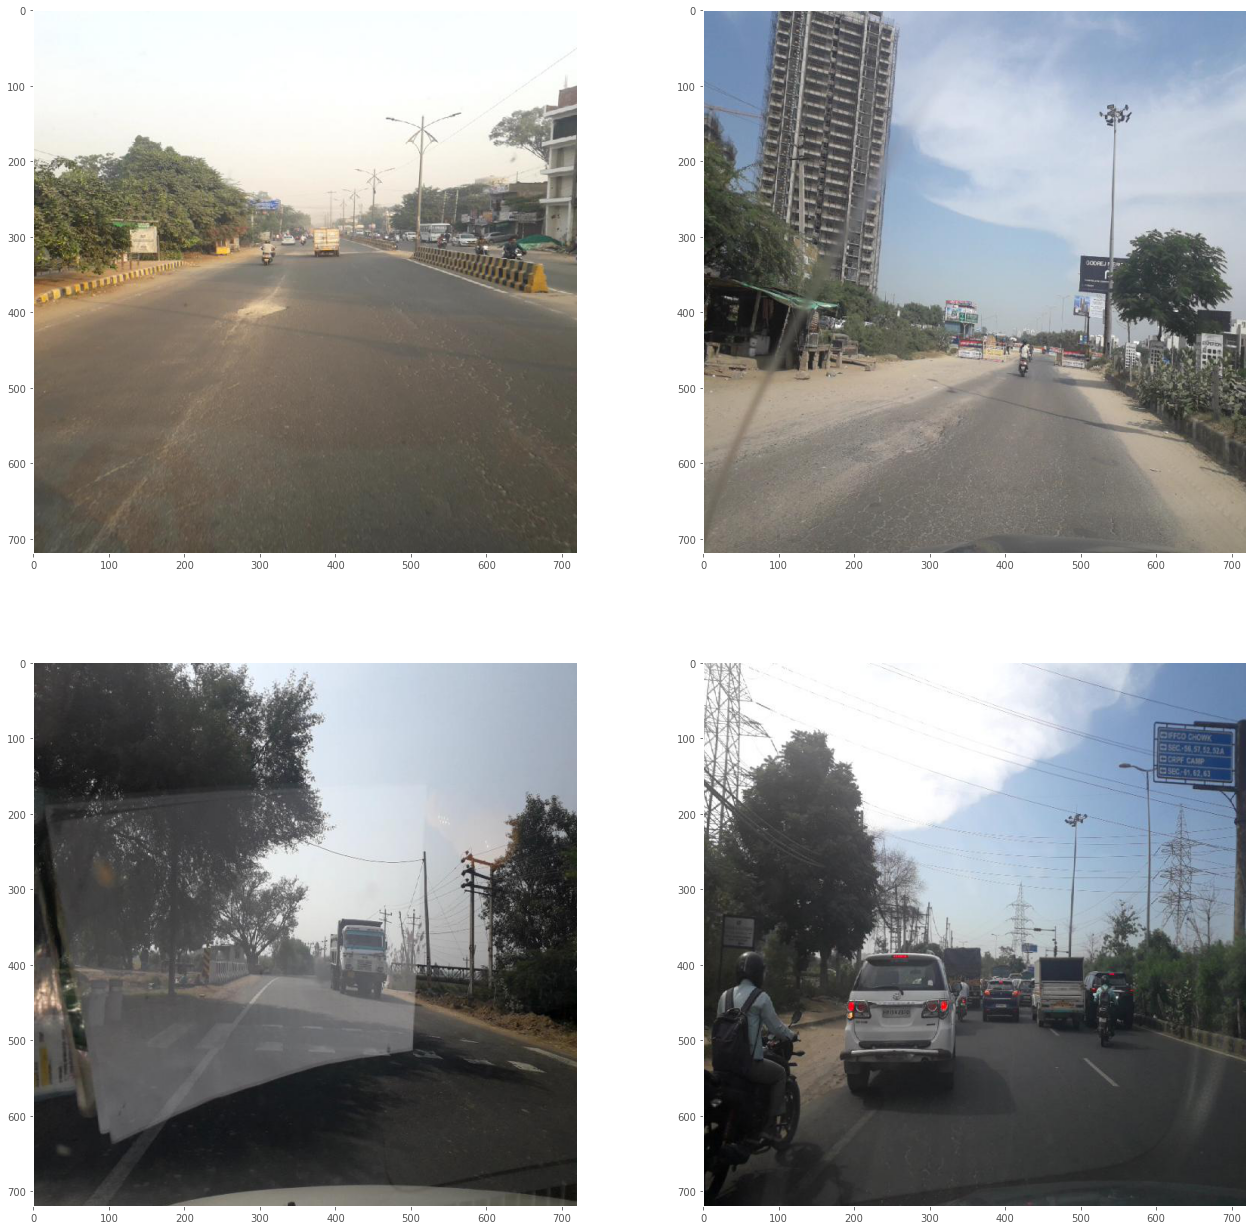

In [184]:
sampling = random.choices(glob.glob("/content/images/train/" + "*.jpg"), k=4)
imlist = []
for i in range(len(sampling)):
  imlist.append(mpimg.imread(sampling[i]))

fig = plt.figure(figsize = (22 , 22) )
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(imlist[0])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(imlist[1])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(imlist[2])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(imlist[3])

#Defect Distrbution and Impact
As we saw above that there are several different types of defects that we have in our data and let's see how it has been distibuted according to the severity levels that the team discussed before.

In [167]:
filepath = glob.glob( "/content/labels/train/"+ "*.txt")
ann = []
for note in filepath:
    with open(note, 'r') as file: # opening file to read from
                lst = []
                lst = file.read().splitlines() 
                lst = list(filter(None, lst)) # list containing all the sentences
                file.close()
    words = []
    for sent in lst:
        words.append(sent.split(' ')) # splitting the sentences into words
    words = list(filter(None, words))
    ann.append(words)

k = 0
labels = []
class0 = []
class1 = []
class2 = []
class3 = []
for im in filepath:
    
    for box in ann[k]:
        w = float(box[3]) 
        h = float(box[4]) 
        class_num = int(box[0])
        if class_num == 0:
          class0.append(0.285 * w * h * 100)
        elif class_num == 1:
          class1.append(w * h * 100)
        elif class_num == 2:
          class2.append(3.14/4 * min(w,h) * max(w,h)* 100 )
        elif class_num == 3:
            class3.append(w * h * 100)
    k = k + 1

#Linear Cracks


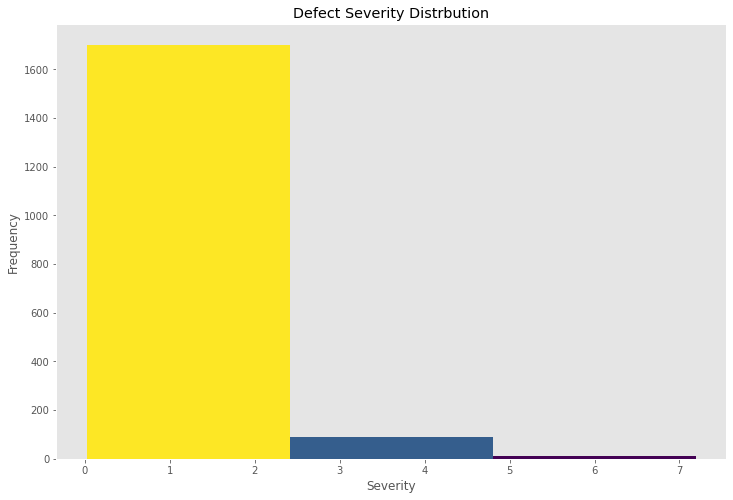

In [185]:
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 

x = class0
plt.figure(figsize=(12,8))
N, bins, patches = plt.hist(x, bins = 3) 
  
# Setting color 
fracs = ((N**(1 / 5)) / N.max()) 
norm = colors.Normalize(fracs.min(), fracs.max()) 
  
for thisfrac, thispatch in zip(fracs, patches): 
    color = plt.cm.viridis(norm(thisfrac)) 
    thispatch.set_facecolor(color) 
  
plt.ylabel('Frequency')
plt.xlabel('Severity')
plt.title('Defect Severity Distrbution')
plt.show()

#Alligator Cracks

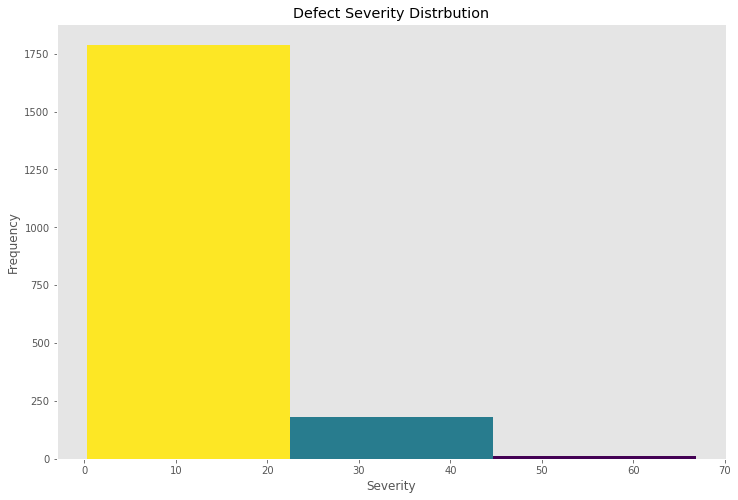

In [186]:
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 

x = class1
plt.figure(figsize=(12,8))
N, bins, patches = plt.hist(x, bins = 3) 
  
# Setting color 
fracs = ((N**(1 / 5)) / N.max()) 
norm = colors.Normalize(fracs.min(), fracs.max()) 
  
for thisfrac, thispatch in zip(fracs, patches): 
    color = plt.cm.viridis(norm(thisfrac)) 
    thispatch.set_facecolor(color) 
  
plt.ylabel('Frequency')
plt.xlabel('Severity')
plt.title('Defect Severity Distrbution')
plt.show()

#Potholes

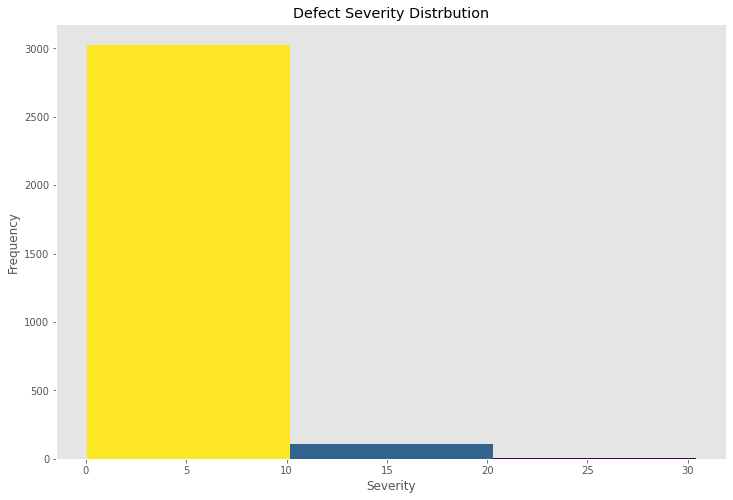

In [187]:
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 

x = class2
plt.figure(figsize=(12,8))
N, bins, patches = plt.hist(x, bins = 3) 
  
# Setting color 
fracs = ((N**(1 / 5)) / N.max()) 
norm = colors.Normalize(fracs.min(), fracs.max()) 
  
for thisfrac, thispatch in zip(fracs, patches): 
    color = plt.cm.viridis(norm(thisfrac)) 
    thispatch.set_facecolor(color) 
  
plt.ylabel('Frequency')
plt.xlabel('Severity')
plt.title('Defect Severity Distrbution')
plt.show()

#Shoulder and Other Defects

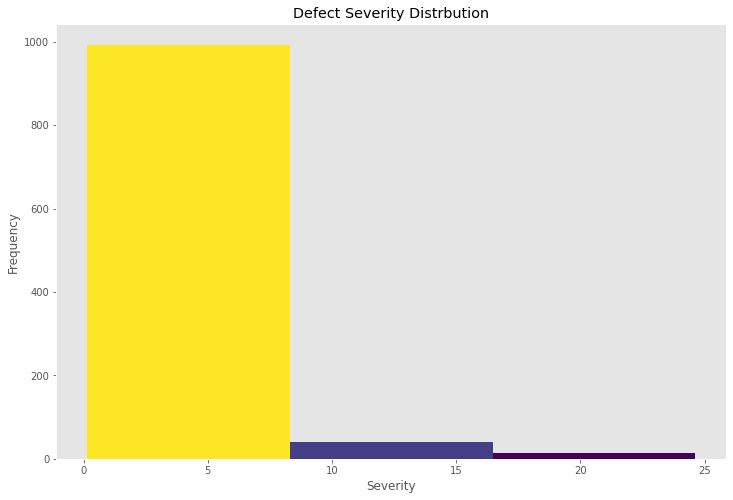

In [188]:
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 

x = class3
plt.figure(figsize=(12,8))
N, bins, patches = plt.hist(x, bins = 3) 
  
# Setting color 
fracs = ((N**(1 / 5)) / N.max()) 
norm = colors.Normalize(fracs.min(), fracs.max()) 
  
for thisfrac, thispatch in zip(fracs, patches): 
    color = plt.cm.viridis(norm(thisfrac)) 
    thispatch.set_facecolor(color) 
  
plt.ylabel('Frequency')
plt.xlabel('Severity')
plt.title('Defect Severity Distrbution')
plt.show()

Now, as we can see that most of the data consists of defects that have a low severity rating, let's validate our own PCI Calculation Formula and see whether it can reflect these characterstics of our dataset.

#PCI Calculation Formula Definition

In [ ]:
#calculating percentage area
def areaPerc(annotation):
  dict = {"Linear Crack": {"Low": 0, "Medium": 0, "High": 0},
          "Alligator Crack": {"Low": 0, "High": 0}, 
          "Potholes": {"Low": 0, "Medium": 0, "High": 0},
          "Shoulders": {"Low": 0, "Medium": 0, "High": 0}}

  with open(annotation, 'r') as file: # opening file to read from
              lst = []
              lst = file.read().splitlines() 
              lst = list(filter(None, lst)) # list containing all the sentences
              file.close()
  words = []
  for sent in lst:
      words.append(sent.split(' ')) # splitting the sentences into words
  words = list(filter(None, words))

  for box in words:
      w = float(box[3]) 
      h = float(box[4])
      class_num = int(box[0])

      if class_num == 0:
        diam = 0.285 * w * h * 100
        if diam <= 2.41:
          dict["Linear Crack"]["Low"] = dict["Linear Crack"]["Low"] + diam
        elif diam > 2.42 and diam <= 4.80:
          dict["Linear Crack"]["Medium"] = dict["Linear Crack"]["Medium"] + diam
        else:
          dict["Linear Crack"]["High"] = dict["Linear Crack"]["High"] + diam

      elif class_num == 1:
        diam = w * h * 100
        if diam <= 33.5:
          dict["Alligator Crack"]["Low"] = dict["Alligator Crack"]["Low"] + diam
        else:
          dict["Alligator Crack"]["High"] = dict["Alligator Crack"]["High"] + diam

      elif class_num == 2:
        diam = 3.14 / 4 * max(w,h) * max(w,h)* 100 
        if diam <= 26: #2.6
          dict["Potholes"]["Low"] = dict["Potholes"]["Low"] + diam
        elif diam > 26 and diam <= 52: #5.2
          dict["Potholes"]["Medium"] = dict["Potholes"]["Medium"] + diam
        else:
          dict["Potholes"]["High"] = dict["Potholes"]["High"] + diam

      elif class_num == 3:
        diam = w * h * 100
        if diam <= 8.3:
          dict["Shoulders"]["Low"] = dict["Shoulders"]["Low"] + diam
        elif diam > 8.3 and diam <= 16.7:
          dict["Shoulders"]["Medium"] = dict["Shoulders"]["Medium"] + diam
        else:
          dict["Shoulders"]["High"] = dict["Shoulders"]["High"] + diam
 
  return dict


In [ ]:
#PCI Calculation funct
def PCICalc(dictn):

  #defining MAEs reflecting the errors
  MAE_ModErr = {"Linear Crack": {"Low": 5, "Medium": 5, "High": 10},
          "Alligator Crack": {"Low": 5, "High": 10}, 
          "Potholes": {"Low": 10, "Medium": 7, "High": 10},
          "Shoulders": {"Low": 10, "Medium": 5, "High": 10}}

  #calculating distress indexes
  LCI = 100 - 40*((dictn["Linear Crack"]["Low"]/MAE_ModErr["Linear Crack"]["Low"]) 
  + (dictn["Linear Crack"]["Medium"]/MAE_ModErr["Linear Crack"]["Medium"]) 
  + (dictn["Linear Crack"]["High"]/MAE_ModErr["Linear Crack"]["High"])) 

  ACI = 100 - 40*((dictn["Alligator Crack"]["Low"]/MAE_ModErr["Alligator Crack"]["Low"]) 
  + (dictn["Alligator Crack"]["High"]/MAE_ModErr["Alligator Crack"]["High"])) 

  PHI = 100 - 40*((dictn["Potholes"]["Low"]/MAE_ModErr["Potholes"]["Low"]) 
  + (dictn["Potholes"]["Medium"]/MAE_ModErr["Potholes"]["Medium"]) 
  + (dictn["Potholes"]["High"]/MAE_ModErr["Potholes"]["High"])) 

  SHI = 100 - 40*((dictn["Shoulders"]["Low"]/MAE_ModErr["Shoulders"]["Low"]) 
  + (dictn["Shoulders"]["Medium"]/MAE_ModErr["Shoulders"]["Medium"]) 
  + (dictn["Shoulders"]["High"]/MAE_ModErr["Shoulders"]["High"]))

  PCI = 100 * ((1 - ((1 - (LCI / 100)) * 0.355)) * (1 - ((1 - (ACI / 100)) * 0.355)) * (1 - ((1 - (PHI / 100)) * 0.262)) * (1 - ((1 - (SHI / 100)) * 0.355)))
  return PCI

#The PCI Calculation Formula Result
After defining our formula let's see the results!



In [173]:
#calculating PCIs for the dataset
PCIvalues = []
for fil in glob.glob("/content/labels/train/" + "*.txt"):
  dict = areaPerc(fil)
  PCI = PCICalc(dict)
  PCIvalues.append(PCI)

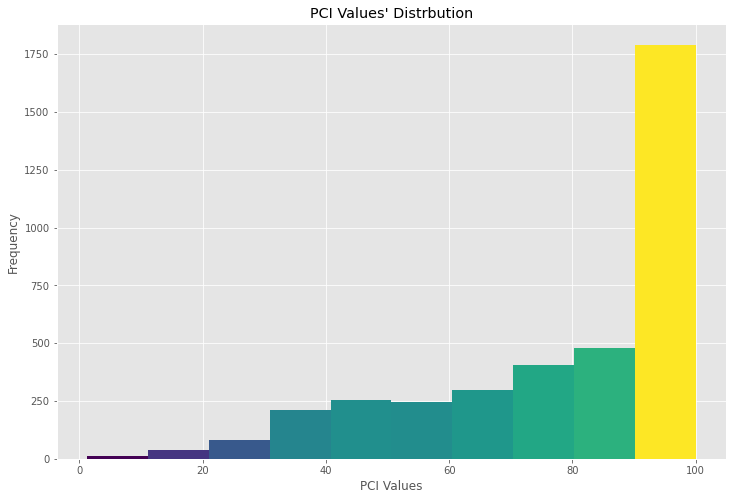

In [174]:
#plotting result
import matplotlib.pyplot as plt
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 

x = PCIvalues
plt.figure(figsize=(12,8))
N, bins, patches = plt.hist(x, bins = 10) 
  
# Setting color 
fracs = ((N**(1 / 5)) / N.max()) 
norm = colors.Normalize(fracs.min(), fracs.max()) 
  
for thisfrac, thispatch in zip(fracs, patches): 
    color = plt.cm.viridis(norm(thisfrac)) 
    thispatch.set_facecolor(color) 
  
plt.ylabel('Frequency')
plt.xlabel('PCI Values')
plt.title('PCI Values\' Distrbution')
plt.show()

We see here, that a large proportion of our PCI values lies in the range of 90 to 100, which is a very strong reflection of our dataset and hence also encourages us in believing in the capablity of our PCI Calculation Formula.

#Visual Verification
Apart from the above approach let us also see how well the formula performs and confirm in its efficacy visually.

We'll see some examples of some images that our PCI Calculation Formula has classified according to the following scale, as prescribed in the research papers that we have read:

PCI Values | Rating
--- | ---
0 - 10 | Failed
10 - 25 | Very Poor
25 - 40 | Poor
40 - 55 | Fair
55 - 70 | Good
70 - 85 | Very Good 
85 - 100 |  Excellent

##Failed - Poor

![](https://drive.google.com/uc?export=view&id=1XdejfiCduk5k4Y6qH1qSxK-ZCv38CSap)

![](https://drive.google.com/uc?export=view&id=1sgXbz9xtTClkD6agruYeOSF0Nd2DULaY)

![](https://drive.google.com/uc?export=view&id=1TGdKcnKK_CNmmvV9XMdd4hMytQBbsfhi)

##Fair - Good

![](https://drive.google.com/uc?export=view&id=1sNaduFrQeTbBp2SqPNvwDQZ5noFTcpGJ)

![](https://drive.google.com/uc?export=view&id=1N2cxqlI6XaY1KidHIne_o7G7rxBpFVEe)

![](https://drive.google.com/uc?export=view&id=1ELaOt1-hBRX3AnziC33j74rAHwQX_gd5)

##Very Good - Excellent

![](https://drive.google.com/uc?export=view&id=1AMuhcvUZJUzZcQTN1Z4jKNLaGKLRD_U9)

![](https://drive.google.com/uc?export=view&id=1YvWLCawX_cQJjYxv4K95Deq7XRZgf9ec)

![](https://drive.google.com/uc?export=view&id=14DwriQzErwgosAc5kAw4OuexoDWa90iE)